# Project 2. EDA.

## Загружаем необходимые библиотеки

In [387]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

# Определим необходимые функции

In [388]:
# Получить верхнюю и нижнюю границы для определения выбросов
def get_outliers_range(col):
    perc25 = col.quantile(0.25)
    perc75 = col.quantile(0.75)
    IQR = perc75 - perc25
    return perc25 - 1.5*IQR, perc75 + 1.5*IQR


# Построить график распределения
def get_boxplot(column, dataframe):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=dataframe.loc[dataframe.loc[:, column].isin(
                    dataframe.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


# Получить статистическую разницу
def get_stat_dif(column, dataframe):
    cols = dataframe.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(dataframe.loc[dataframe.loc[:, column] == comb[0], 'score'],
                     dataframe.loc[dataframe.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            return True
    return False

## Загружаем исходные данные

In [389]:
df = pd.read_csv('../../stud_math.csv')

In [390]:
display(df.head(20))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [391]:
# Выборка представлена 395 строками и 30 столбцами

## Первичная обработка данных

In [392]:
# Проверим название столбцов
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [393]:
# Изменим название одного столбца
df.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)
# Проверим столбец school
df.school.value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [394]:
# Итого у нас 2 школы, пропусков данных нет, бОльшая часть учеников в выборке представлена школой под кодом GP
# Проверим столбец sex
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

17.0

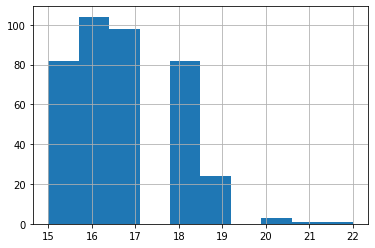

In [395]:
# Столбец sex не содержит некорректных и пустых данных, распределение полов примерно одинаковое
# Проверим столбец age
df.age.hist()
display(df.age.value_counts(dropna=False))
df.age.median()

In [396]:
# Возраст учеников находится в диапазоне 15-21 лет, медианное значение на уровне 17 лет
# Пропусков данных нет, однако визуально есть выбросы
# Определим наличие выбросов
lower, upper = get_outliers_range(df.age)
df[(df.age < lower) | (df.age > upper)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
247,GP,M,22,U,GT3,T,3.0,1.0,services,services,other,mother,1.0,1.0,3.0,no,no,no,no,no,-3.0,no,yes,yes,5.0,4.0,5.0,1.0,16.0,40.0


In [397]:
# Обнаружен один выброс, удалим его
df = df[df.age < 22]

In [398]:
# Проверим столбец address
df.address.value_counts(dropna=False)

U      294
R       83
NaN     17
Name: address, dtype: int64

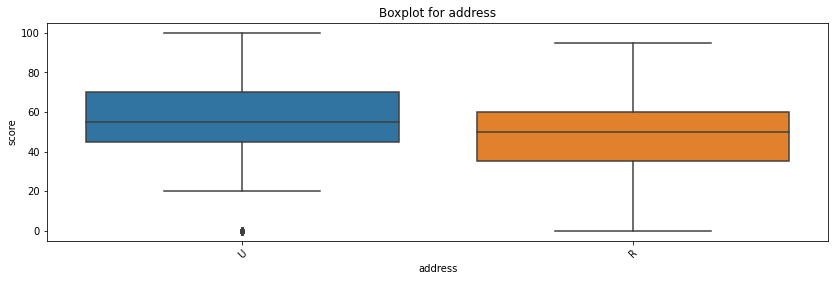

In [399]:
get_boxplot('address', df)

In [400]:
# Столбец address содержит 15 пустых значений, некорректных данных не выявлено
# Из графика видно, что проживание в/за чертой города оказывает влияние на успеваемость
# Проверим столбец famsize
df.famsize.value_counts(dropna=False)

GT3    260
LE3    107
NaN     27
Name: famsize, dtype: int64

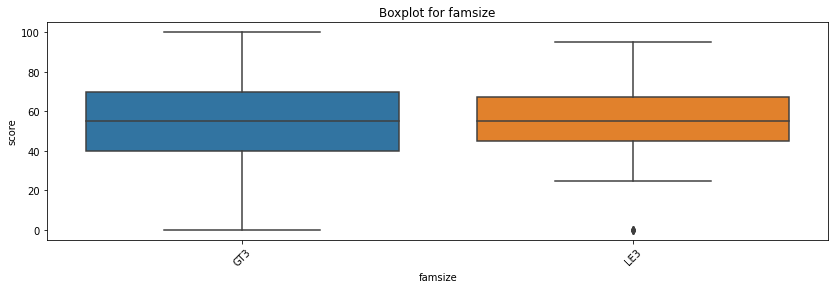

In [401]:
get_boxplot('famsize', df)

In [402]:
# Столбец famsize содержит 27 пустых значений, некорректных данных не выявлено
# Похоже, что размер семьи более или менее 3 членов, не оказывает очевидного влияния на оценки
# Проверим столбец Pstatus
df.Pstatus.value_counts(dropna=False)

T      313
NaN     45
A       36
Name: Pstatus, dtype: int64

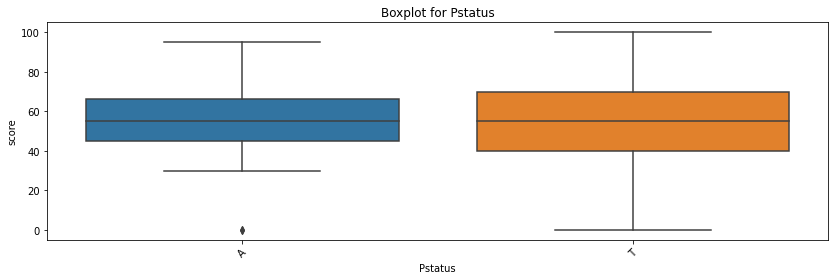

In [403]:
get_boxplot('Pstatus', df)

4.0    131
2.0    102
3.0     96
1.0     59
0.0      3
NaN      3
Name: Medu, dtype: int64

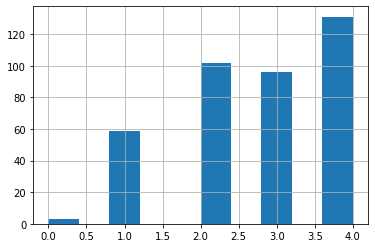

In [404]:
# Столбец Pstatus не содержит некорректных данных
# Много данных пропущено, стоит рассмотреть вопрос об игнорировании данного столбца при дальнейшем анализе
# Проверим столбец Medu
df.Medu.hist()
df.Medu.value_counts(dropna=False)

2.0     106
3.0      96
4.0      88
1.0      77
NaN      24
0.0       2
40.0      1
Name: Fedu, dtype: int64

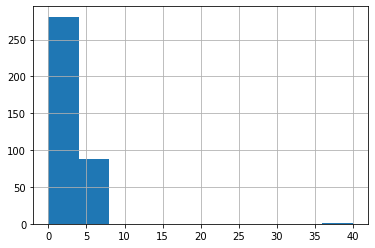

In [405]:
# Столбец Medu не содержит некорректных данных, количество пропусков минимально
# Проверим столбец Fedu
df.Fedu.hist()
df.Fedu.value_counts(dropna=False)

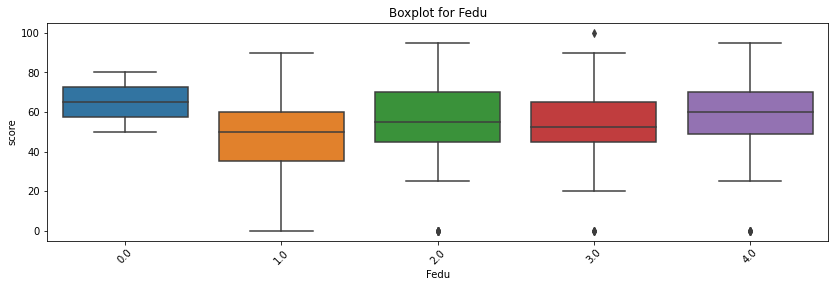

In [447]:
get_boxplot('Fedu', df)

In [406]:
# Большое количество пропусков в столбце Fedu
# Возможно, исходя и здравого смысла, стоит объединить столбцы Medu и Fedu, посчитав показатель как среднее
# арифметическое двух столбцов
# Столбец Fedu содержит явный выброс, удалим его
df = df[df.Fedu != 40]

In [448]:
# Проверим столбец Mjob
df.Mjob.value_counts(dropna=False)

other       127
services     95
at_home      58
teacher      55
health       32
NaN          19
Name: Mjob, dtype: int64

In [449]:
# Проверим столбец Fjob
df.Fjob.value_counts(dropna=False)

other       193
services     97
NaN          36
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

In [450]:
# Много пропусков в столбце Fjob
# Проверим столбец reason
df.reason.value_counts(dropna=False)

course        135
reputation    101
home          100
other          33
NaN            17
Name: reason, dtype: int64

In [451]:
# Проверим столбец guardian
df.guardian.value_counts(dropna=False)

mother    246
father     85
NaN        31
other      24
Name: guardian, dtype: int64

In [452]:
# Проверим столбец traveltime
df.traveltime.value_counts(dropna=False)

1.0    237
2.0     94
NaN     28
3.0     20
4.0      7
Name: traveltime, dtype: int64

In [453]:
# Проверим столбец studytime
df.studytime.value_counts(dropna=False)

2.0    189
1.0    101
3.0     62
4.0     27
NaN      7
Name: studytime, dtype: int64

In [454]:
# Проверим столбец failures
df.failures.value_counts(dropna=False)

0.0    289
1.0     48
NaN     22
2.0     14
3.0     13
Name: failures, dtype: int64

In [455]:
# Проверим столбец schoolsup
df.schoolsup.value_counts(dropna=False)

no     328
yes     49
NaN      9
Name: schoolsup, dtype: int64

In [456]:
# Проверим столбец famsup
df.famsup.value_counts(dropna=False)

yes    214
no     134
NaN     38
Name: famsup, dtype: int64

In [457]:
# Большое количество данных пропущено в столбце famsup
# Проверим столбец paid
df.paid.value_counts(dropna=False)

no     195
yes    152
NaN     39
Name: paid, dtype: int64

In [458]:
# Большое количество данных пропущено в столбце paid
# Проверим столбец activities
df.activities.value_counts(dropna=False)

yes    191
no     181
NaN     14
Name: activities, dtype: int64

In [459]:
# Проверим столбец nursery
df.nursery.value_counts(dropna=False)

yes    296
no      75
NaN     15
Name: nursery, dtype: int64

In [419]:
# Проверим столбец studytime_granular
df.studytime_granular.value_counts()

-6.0     194
-3.0     102
-9.0      63
-12.0     27
Name: studytime_granular, dtype: int64

In [420]:
# Поскольку в задаче отсутствует описание данного поля, сравним его с полем studytime
df[['studytime', 'studytime_granular']].corr()

,studytime,studytime_granular
studytime,1.0,-1.0
studytime_granular,-1.0,1.0


In [421]:
# Как видно, эти столбцы скоррелированы полностью, а значит неизвестный столбец studytime_granular можно удалить
df.drop(columns=['studytime_granular'], inplace=True)

In [460]:
# Проверим столбец higher
df.higher.value_counts(dropna=False)

yes    348
NaN     20
no      18
Name: higher, dtype: int64

In [461]:
# Проверим столбец internet
df.internet.value_counts(dropna=False)

yes    297
no      55
NaN     34
Name: internet, dtype: int64

In [462]:
# Проверим столбец romantic
df.romantic.value_counts(dropna=False)

no     233
yes    122
NaN     31
Name: romantic, dtype: int64

In [463]:
# Проверим столбец famrel
df.famrel.value_counts(dropna=False)

4.0    178
5.0     95
3.0     62
NaN     27
2.0     17
1.0      7
Name: famrel, dtype: int64

In [426]:
# Одно значение в столбце famrel не соответствует возможному интервалу значений, удалим строку с этим значением
df = df[df.famrel != -1]

In [464]:
# Проверим столбец freetime
df.freetime.value_counts(dropna=False)

3.0    152
4.0    109
2.0     61
5.0     37
1.0     18
NaN      9
Name: freetime, dtype: int64

In [465]:
# Проверим столбец goout
df.goout.value_counts(dropna=False)

3.0    126
2.0     99
4.0     81
5.0     50
1.0     23
NaN      7
Name: goout, dtype: int64

In [466]:
# Проверим столбец health
df.health.value_counts(dropna=False)

5.0    136
3.0     88
4.0     59
1.0     46
2.0     42
NaN     15
Name: health, dtype: int64

0.0      111
2.0       60
4.0       52
6.0       31
8.0       21
10.0      17
12.0      12
14.0      11
3.0        8
16.0       6
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

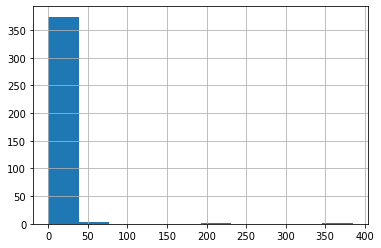

In [430]:
# Проверим столбец absences
df.absences.hist()
df.absences.value_counts()

In [431]:
# Определим наличие выбросов
lower, upper = get_outliers_range(df.absences)
print(df[(df.absences < lower) | (df.absences > upper)].absences.count())
print(lower, upper)

17
-12.0 20.0


In [432]:
# Несмотря на то, что определились выбросы, мы их пока оставим, так как их много относительно размера выборки

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
60.0     30
40.0     29
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

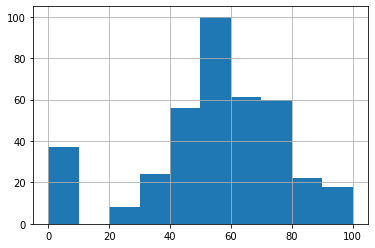

In [433]:
# Проверим столбец score
df.score.hist()
df.score.value_counts()

In [434]:
# Поскольку целью проекта является выявление влияния факторов на оценку, удалим строки, где оценка не указана
df = df[df.score.notnull()]

In [435]:
# Определим наличие выбросов
lower, upper = get_outliers_range(df.score)
print(df[(df.score < lower) | (df.score > upper)].score.count())
print(lower, upper)

0
-5.0 115.0


In [436]:
# Выбросы не обнаружены
# Большое количество нулевых оценок, что заставляет задуматься о корректности выборки в этой части,
# возможно такие данные нужно удалить. Без учета нулевых оценок, распределение оценок выглядит нормальным.

## Корреляционный анализ

In [437]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.156675,-0.136250,0.091075,-0.002558,0.174789,0.046799,0.001427,0.100901,-0.046703,0.094969,-0.153589
Medu,-0.156675,1.000000,0.628878,-0.163837,0.082112,-0.245909,-0.008605,0.033433,0.068241,-0.045038,-0.014002,0.213735
Fedu,-0.136250,0.628878,1.000000,-0.146428,0.006593,-0.262329,-0.021730,-0.011356,0.060938,0.011688,0.023425,0.127676
traveltime,0.091075,-0.163837,-0.146428,1.000000,-0.119149,0.066335,-0.045653,-0.019272,0.040806,-0.015650,-0.046609,-0.075262
studytime,-0.002558,0.082112,0.006593,-0.119149,1.000000,-0.165327,0.029823,-0.124085,-0.049070,-0.083758,-0.023295,0.112067
failures,0.174789,-0.245909,-0.262329,0.066335,-0.165327,1.000000,-0.011232,0.092953,0.098518,0.104051,0.053997,-0.344716
famrel,0.046799,-0.008605,-0.021730,-0.045653,0.029823,-0.011232,1.000000,0.165398,0.062484,0.106621,-0.082730,0.052133
freetime,0.001427,0.033433,-0.011356,-0.019272,-0.124085,0.092953,0.165398,1.000000,0.289520,0.073755,0.010535,0.019618
goout,0.100901,0.068241,0.060938,0.040806,-0.049070,0.098518,0.062484,0.289520,1.000000,-0.005892,-0.049621,-0.128735
health,-0.046703,-0.045038,0.011688,-0.015650,-0.083758,0.104051,0.106621,0.073755,-0.005892,1.000000,-0.015137,-0.072365


In [438]:
df.corr().applymap(lambda x: x if x > 0.5 else '')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1,,,,,,,,,,,
Medu,,1,0.628878,,,,,,,,,
Fedu,,0.628878,1,,,,,,,,,
traveltime,,,,1,,,,,,,,
studytime,,,,,1,,,,,,,
failures,,,,,,1,,,,,,
famrel,,,,,,,1,,,,,
freetime,,,,,,,,1,,,,
goout,,,,,,,,,1,,,
health,,,,,,,,,,1,,


In [439]:
# Анализ показывает, что полностью скоррелированных данных в выборке нет. Интересно отметить,
# что образование мужа и жены имеют некоторую корреляцию, что видимо значит, что люди выбирают себе пару
# в том числе среди близких по уровню образования.

## Анализ номинативных переменных

In [440]:
# Для наглядности построим графики распределения баллов

In [441]:
nominative_columns = set(df.columns) - set(df.corr().columns)

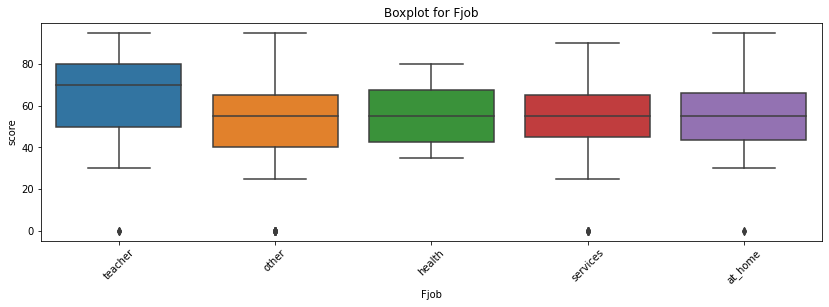

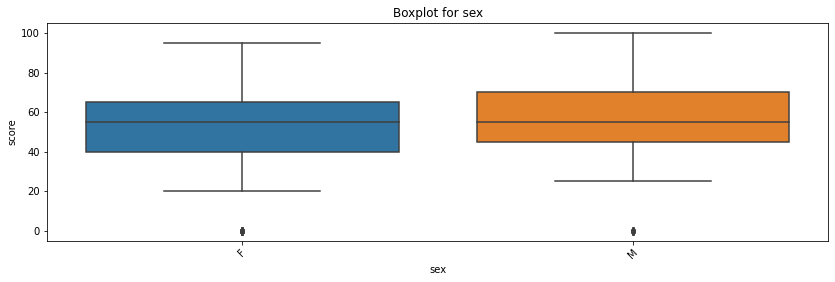

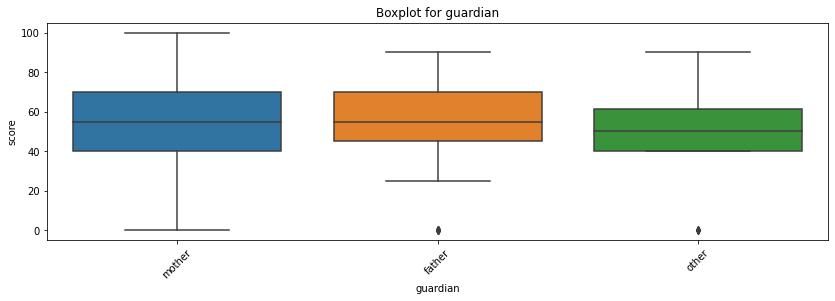

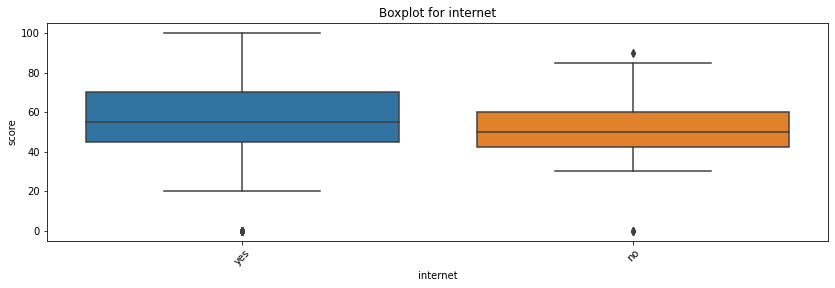

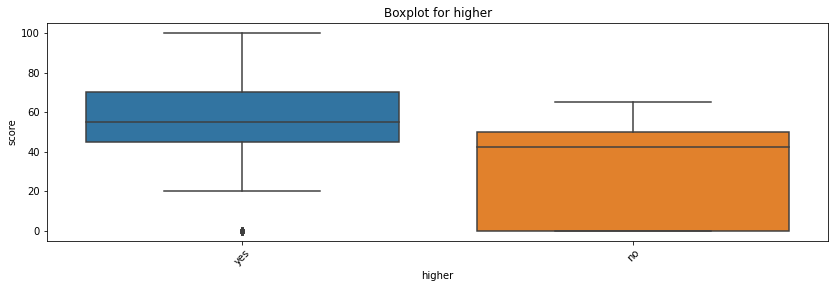

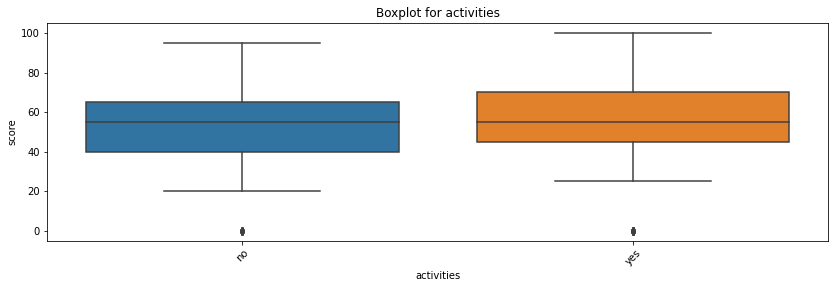

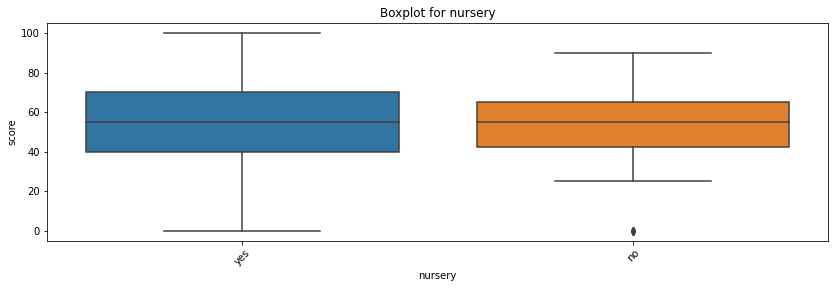

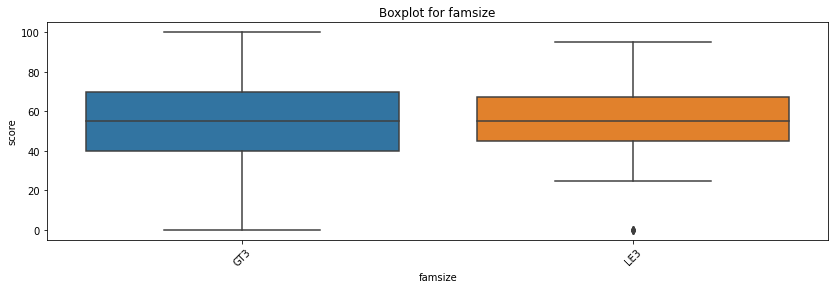

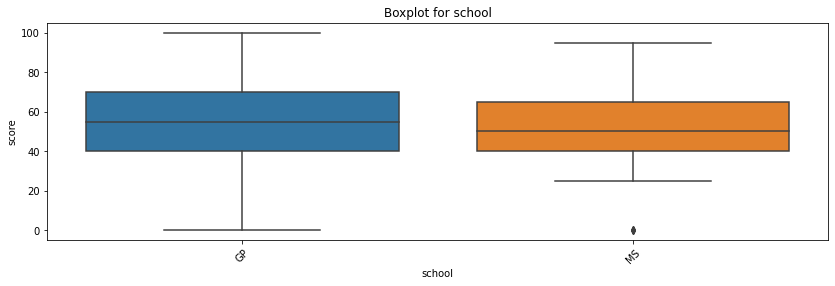

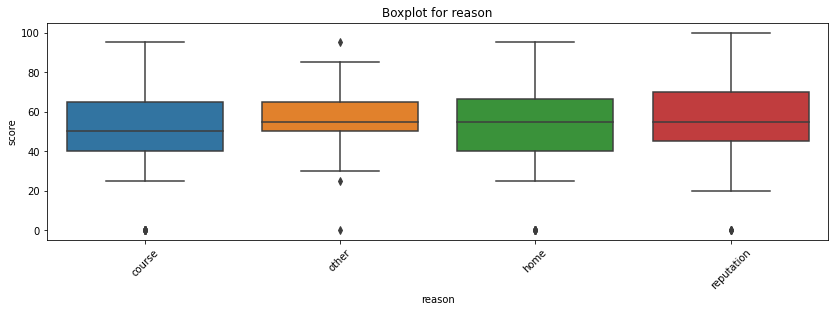

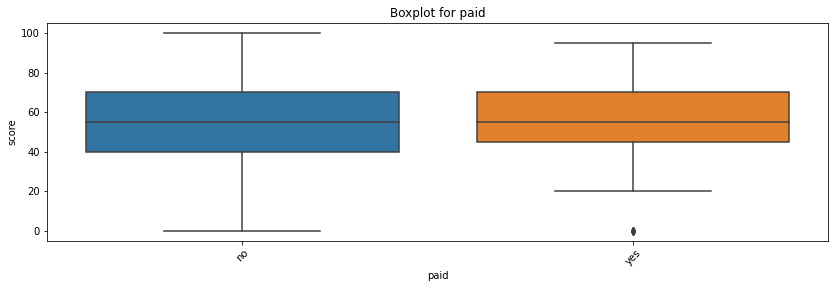

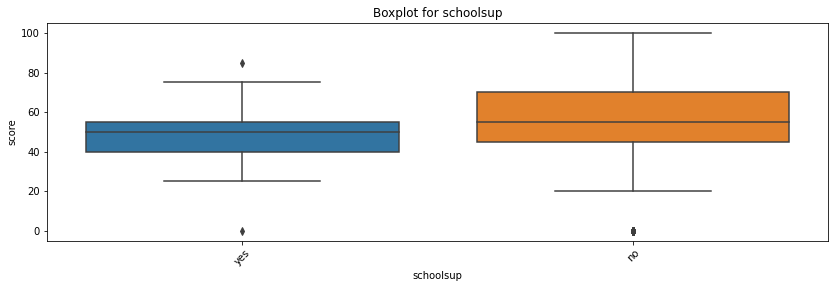

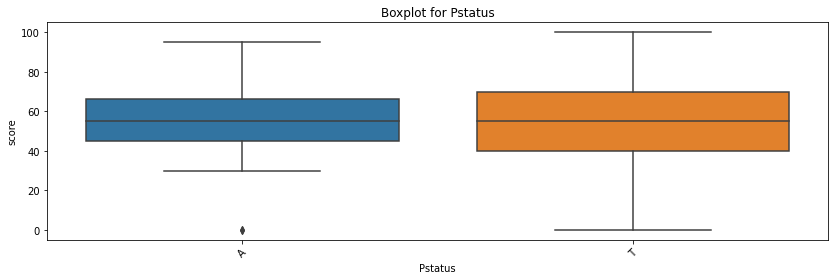

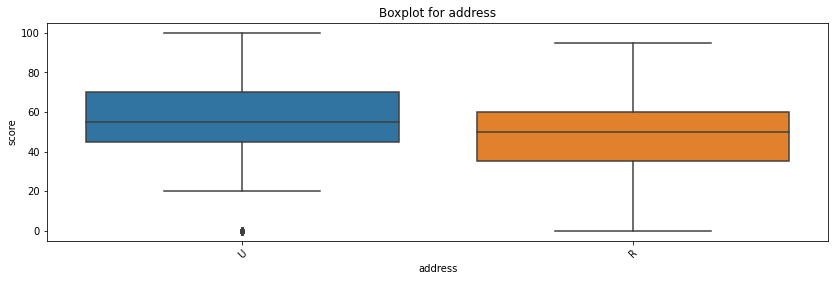

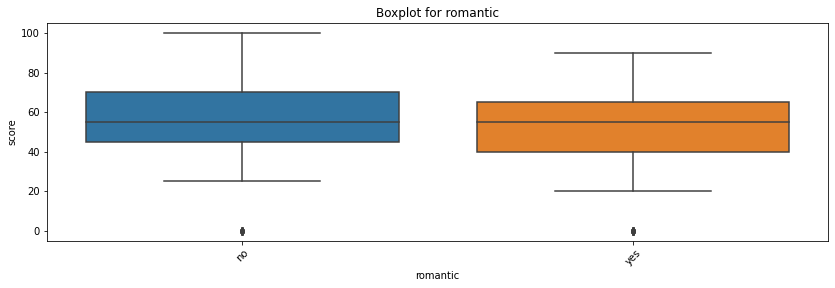

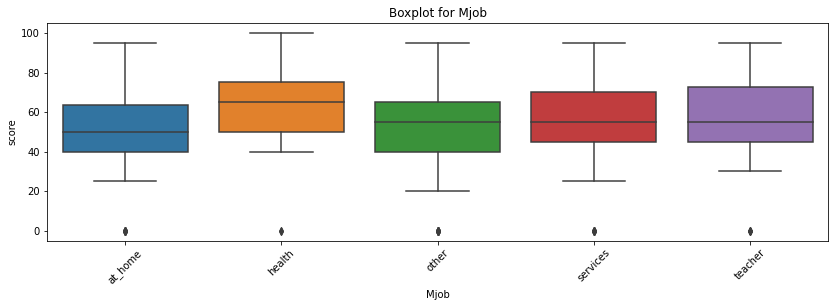

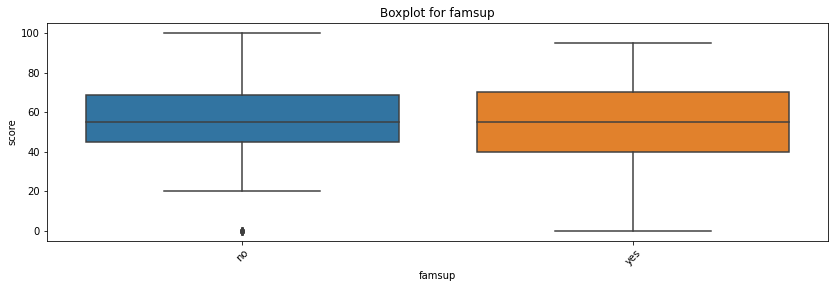

In [442]:
for col in nominative_columns:
    get_boxplot(col, df)

In [443]:
# итоговые столбцы для дальнейшего построения модели
final_columns = list(df.corr().columns)

In [444]:
# Рассчитаем статистически значимые различия оценки от номинативных показателей
for col in nominative_columns:
    if get_stat_dif(col, df) is True:
        final_columns.append(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки Mjob


In [445]:
# Анализ номинативных показателей говорит о следующем:
#     - Прослеживается связь успеваемости по математике с полом ученика, что соответствует
#     общепризнанному мнению, что мальчикам математика дается легче.
#     - Мотивирующим действием обладает желание получения в дальнейшем высшего образования,
#     такие ученики демонстрируют более высокие оценки.
#     - Проживание в черте города благоприятно оторажается на оценках в сравнении с теми, кто живет за городом,
#     что также соответствует выводам специалистов - долгая дорога на работу/учебу вызывает стресс и депрессию.
#     - Вполне предсказуемо снижение баллов по математике наличие романтических отношений - это сильно
#     отвлекает от учебы.
#     - Несколько неожиданным кажется влияние на успеваемость по математике работа отца. Я бы отказался от
#     этой метрики по ряду причин, в том числе:
#         - если учитывать работу отца, то надо учитывать и работу матери
#         - очень узкий перечень профессий, принцип их группировки для меня не понятен
#         - очевидно прямое влияние в случае, если родитель является преподавателем ученика в силу
#         семейных отношений

In [446]:
# Таким образом, оставляем для дальнейшего обучения модели следующие столбцы
final_columns.remove('Mjob')
final_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score',
 'sex',
 'higher',
 'address',
 'romantic']

In [470]:
# Показатели обработанных данных
print(f'строк - {df.count().max()}', f'столбцов - {len(final_columns)}')

строк - 386 столбцов - 16


In [471]:
# Дополнительный комментарий для ментора:
#     Уважаемый ментор! Не судите пожалуйста строго, я еще только учусь ) Спасибо!